In [37]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn
!date

Sun Aug  3 08:56:42 PDT 2025


# A look at the disability weights relevant to Alz Sim

> Where do our draws of disability weights come from, and are they correlated? For example, the DWs for moderate vs. severe Alzheimer's are (respectively):
0.377 (0.252-0.508)
0.449 (0.304-0.595)
The uncertainty intervals overlap, so if we independently sample a draw for each, we could end up with the DW for severe being less than the DW for moderate. Is this something we've thought about in our sims before?


> On a technical level, I can only trace it as far back as /ihme/epi/disability_weights/standard/dw_full.csv and /ihme/epi/disability_weights/custom/combined_dws.csv, which our README (/mnt/team/simulation_science/costeffectiveness/auxiliary_data/GBD_2021/02_processed_data/disability_weight/sequela/all/README.rst) says have an "unknown" owner -- at a file system level they are owned by Kelly Cercy. Those files already contain draws.



In [38]:
import pandas as pd
data = pd.read_csv('/ihme/epi/disability_weights/standard/dw_full.csv')
dementia_data = data[data.healthstate.notnull() & data.healthstate.str.contains('dementia')].set_index('healthstate').filter(like='draw')

assert not (dementia_data.loc['dementia_mild'] > dementia_data.loc['dementia_mod']).any()
assert not (dementia_data.loc['dementia_mod'] > dementia_data.loc['dementia_sev']).any()

In [39]:
dementia_data

,draw0,draw1,draw2,draw3,draw4,draw5,draw6,draw7,draw8,draw9,...,draw990,draw991,draw992,draw993,draw994,draw995,draw996,draw997,draw998,draw999
healthstate,,,,,,,,,,,,,,,,,,,,,
dementia_mild,0.082004,0.071909,0.050003,0.042061,0.045446,0.046714,0.069815,0.070546,0.057855,0.046096,...,0.061352,0.068312,0.074566,0.063246,0.069492,0.076133,0.037073,0.060730,0.055252,0.052455
dementia_mod,0.487914,0.419055,0.351750,0.224929,0.292814,0.258603,0.366260,0.417503,0.376681,0.294952,...,0.407167,0.426339,0.473478,0.338802,0.490212,0.434210,0.287383,0.386220,0.332623,0.377433
dementia_sev,0.615274,0.462025,0.422802,0.263178,0.381199,0.328348,0.406969,0.500901,0.462807,0.380711,...,0.482417,0.467646,0.571473,0.419041,0.587068,0.490273,0.328459,0.464664,0.412992,0.483258


In [40]:
def summarize(x, decimals=3):
    percentiles=[.025,.975]
    return np.round(
        x.describe(
            percentiles=percentiles),
        decimals=decimals).loc[['mean', '2.5%', '97.5%']]

In [41]:
np.round(
    dementia_data.T.describe(
        percentiles=[.025, .975]),
    3)
summarize(dementia_data.T)

healthstate,dementia_mild,dementia_mod,dementia_sev
mean,0.069,0.377,0.449
2.5%,0.046,0.252,0.304
97.5%,0.099,0.508,0.595


# Now, what to use for MCI?

Theo proposed deriving it from removing "Motor impairment, mild" from the "Motor plus cognitive impairments, mild" weight, while Nathaniel found "Borderline intellectual functioning" that seems like it should be equivalent.

In [42]:
motor_data = data[data.healthstate.notnull() & data.healthstate.str.contains('motor')].set_index('healthstate').filter(like='draw')
motor_data

,draw0,draw1,draw2,draw3,draw4,draw5,draw6,draw7,draw8,draw9,...,draw990,draw991,draw992,draw993,draw994,draw995,draw996,draw997,draw998,draw999
healthstate,,,,,,,,,,,,,,,,,,,,,
motor_mild,0.008844,0.009795,0.006990,0.006641,0.005205,0.008497,0.009708,0.006767,0.007532,0.006522,...,0.006862,0.008639,0.008812,0.009375,0.005524,0.009910,0.003373,0.005976,0.006705,0.005372
motor_mod,0.072569,0.065104,0.049484,0.041910,0.036824,0.042831,0.059172,0.054478,0.052177,0.040724,...,0.055873,0.064051,0.076226,0.061064,0.054456,0.061882,0.028506,0.052352,0.047057,0.041300
motor_sev,0.525837,0.432535,0.364404,0.207623,0.337283,0.279751,0.372073,0.443562,0.401761,0.343858,...,0.418155,0.420998,0.520176,0.372132,0.547739,0.465226,0.289071,0.424984,0.378737,0.405965
motor_cog_mild,0.039727,0.032344,0.024579,0.017025,0.022757,0.021892,0.028699,0.024444,0.023923,0.018277,...,0.023728,0.029828,0.032497,0.028502,0.021619,0.032537,0.013554,0.028414,0.024809,0.022000
motor_cog_mod,0.296321,0.229703,0.166815,0.110598,0.145098,0.142998,0.166515,0.210188,0.198271,0.143936,...,0.196509,0.229930,0.233743,0.194941,0.285038,0.226822,0.127285,0.222486,0.182550,0.174877
motor_cog_sev,0.656316,0.558978,0.490902,0.359354,0.502081,0.402482,0.507520,0.571038,0.546516,0.451370,...,0.540282,0.576238,0.672516,0.512512,0.707704,0.626740,0.432666,0.583937,0.516480,0.559209


In [43]:
# Theo's spreadsheet shows how to do this with means
D2 = motor_data.loc['motor_mild']
D3 = motor_data.loc['motor_cog_mild']
s_cog = (D3 - D2) / (1 - D2)
summarize(s_cog)

mean     0.021
2.5%     0.013
97.5%    0.032
dtype: float64

In [44]:
id_data = data[data.healthstate.notnull() & data.healthstate.str.contains('id_')].set_index('healthstate').filter(like='draw')
id_data

,draw0,draw1,draw2,draw3,draw4,draw5,draw6,draw7,draw8,draw9,...,draw990,draw991,draw992,draw993,draw994,draw995,draw996,draw997,draw998,draw999
healthstate,,,,,,,,,,,,,,,,,,,,,
id_bord,0.010217,0.010874,0.008733,0.008380,0.005867,0.008863,0.010808,0.007049,0.007391,0.006960,...,0.007017,0.009590,0.009937,0.011696,0.005382,0.008356,0.003210,0.006186,0.007601,0.005629
id_mild,0.049985,0.050044,0.030939,0.027843,0.025057,0.028407,0.039838,0.038647,0.035142,0.025486,...,0.030684,0.039819,0.043948,0.040618,0.029286,0.040538,0.019676,0.029233,0.032945,0.029590
id_mod,0.137598,0.105497,0.081749,0.062278,0.066042,0.070239,0.098933,0.092808,0.084318,0.068017,...,0.085429,0.108652,0.121846,0.087004,0.098919,0.111597,0.045957,0.100461,0.086251,0.074950
id_sev,0.211603,0.179959,0.131281,0.089530,0.100803,0.104867,0.151788,0.181218,0.153532,0.118195,...,0.149515,0.168517,0.246550,0.159616,0.186479,0.205343,0.095785,0.146291,0.133316,0.136640
id_prof,0.324717,0.206707,0.175121,0.109399,0.174235,0.147654,0.150887,0.235194,0.183148,0.138926,...,0.211513,0.237802,0.269124,0.178053,0.243305,0.215713,0.126267,0.181186,0.174620,0.174538


In [45]:
summarize(id_data.T)

healthstate,id_bord,id_mild,id_mod,id_sev,id_prof
mean,0.011,0.043,0.100,0.160,0.200
2.5%,0.005,0.026,0.066,0.107,0.133
97.5%,0.020,0.064,0.142,0.226,0.283


In [46]:
summarize(dementia_data.T)

healthstate,dementia_mild,dementia_mod,dementia_sev
mean,0.069,0.377,0.449
2.5%,0.046,0.252,0.304
97.5%,0.099,0.508,0.595


In [53]:
all_data = pd.concat([id_data, dementia_data])
all_data.loc['cog_mild'] = s_cog
all_data

,draw0,draw1,draw2,draw3,draw4,draw5,draw6,draw7,draw8,draw9,...,draw990,draw991,draw992,draw993,draw994,draw995,draw996,draw997,draw998,draw999
healthstate,,,,,,,,,,,,,,,,,,,,,
id_bord,0.010217,0.010874,0.008733,0.008380,0.005867,0.008863,0.010808,0.007049,0.007391,0.006960,...,0.007017,0.009590,0.009937,0.011696,0.005382,0.008356,0.003210,0.006186,0.007601,0.005629
id_mild,0.049985,0.050044,0.030939,0.027843,0.025057,0.028407,0.039838,0.038647,0.035142,0.025486,...,0.030684,0.039819,0.043948,0.040618,0.029286,0.040538,0.019676,0.029233,0.032945,0.029590
id_mod,0.137598,0.105497,0.081749,0.062278,0.066042,0.070239,0.098933,0.092808,0.084318,0.068017,...,0.085429,0.108652,0.121846,0.087004,0.098919,0.111597,0.045957,0.100461,0.086251,0.074950
id_sev,0.211603,0.179959,0.131281,0.089530,0.100803,0.104867,0.151788,0.181218,0.153532,0.118195,...,0.149515,0.168517,0.246550,0.159616,0.186479,0.205343,0.095785,0.146291,0.133316,0.136640
id_prof,0.324717,0.206707,0.175121,0.109399,0.174235,0.147654,0.150887,0.235194,0.183148,0.138926,...,0.211513,0.237802,0.269124,0.178053,0.243305,0.215713,0.126267,0.181186,0.174620,0.174538
dementia_mild,0.082004,0.071909,0.050003,0.042061,0.045446,0.046714,0.069815,0.070546,0.057855,0.046096,...,0.061352,0.068312,0.074566,0.063246,0.069492,0.076133,0.037073,0.060730,0.055252,0.052455
dementia_mod,0.487914,0.419055,0.351750,0.224929,0.292814,0.258603,0.366260,0.417503,0.376681,0.294952,...,0.407167,0.426339,0.473478,0.338802,0.490212,0.434210,0.287383,0.386220,0.332623,0.377433
dementia_sev,0.615274,0.462025,0.422802,0.263178,0.381199,0.328348,0.406969,0.500901,0.462807,0.380711,...,0.482417,0.467646,0.571473,0.419041,0.587068,0.490273,0.328459,0.464664,0.412992,0.483258
cog_mild,0.031158,0.022772,0.017713,0.010454,0.017645,0.013510,0.019177,0.017798,0.016515,0.011832,...,0.016983,0.021374,0.023895,0.019308,0.016185,0.022852,0.010216,0.022572,0.018226,0.016718


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from typing import Optional

def plot_draw_distributions(
    df: pd.DataFrame,
    title: str = "Distribution of Draws by Health State",
    figsize: tuple[int, int] = (12, 6),
    alpha: float = 0.3,
    dot_size: float = 5,
    jitter: bool = True,
    semilogy: bool = False,
    dot_fraction: float = 0.1,
    horizontal: bool = False,
    save_path: Optional[str] = None
) -> None:
    df = df.copy()
    df.index.name = "healthstate"

    # Sort by mean
    row_means = df.mean(axis=1)
    df["mean_draw"] = row_means
    df = df.sort_values(by="mean_draw")
    df = df.drop(columns="mean_draw")

    df_reset = df.reset_index()
    df_long = df_reset.melt(id_vars="healthstate", var_name="draw", value_name="value")

    if dot_fraction < 1.0:
        df_long = df_long.sample(frac=dot_fraction, random_state=42)

    categories = df.index.tolist()
    palette = sns.color_palette("Set2", len(categories))
    color_map = dict(zip(categories, palette))

    plt.figure(figsize=figsize)
    ax = plt.gca()

    x_axis, y_axis = ("value", "healthstate") if horizontal else ("healthstate", "value")

    # Plot the boxplot
    sns.boxplot(
        data=df_long,
        x=x_axis, y=y_axis,
        hue="healthstate", palette=color_map,
        width=0.5, showcaps=True, showfliers=False,
        boxprops={"edgecolor": "black"},
        whiskerprops={"linewidth": 1.5},
        linewidth=1,
        legend=False,
        ax=ax
    )

    # Plot the dots
    sns.stripplot(
        data=df_long,
        x=x_axis, y=y_axis,
        hue="healthstate", palette=color_map,
        jitter=jitter, alpha=alpha, size=dot_size,
        dodge=False, legend=False,
        ax=ax
    )
    
    plt.grid(True)

    # Add accurate summary text using boxplot_stats
    summary_stats = []
    for state in categories:
        draws = df.loc[state].values
        stats = boxplot_stats([draws])[0]
        summary_stats.append({
            'label': state,
            'median': stats['med'],
            'whislo': stats['whislo'],
            'whishi': stats['whishi']
        })

    for idx, stats in enumerate(summary_stats):
        text = f"{stats['median']:.2f} [{stats['whislo']:.2f}, {stats['whishi']:.2f}]"
        if horizontal:
            ax.text(
                x=stats['whishi'] + .01,
                y=idx,
                s=text,
                va="center",
                ha="left",
                fontsize=10
            )
        else:
            ax.text(
                x=idx,
                y=stats['whishi'] + 0.01,
                s=text,
                va="bottom",
                ha="center",
                fontsize=10
            )

    if semilogy:
        if horizontal:
            ax.set_xscale("log")
        else:
            ax.set_yscale("log")

    ax.set_title(title)
    if horizontal:
        ax.set_xlabel("Value")
        ax.set_ylabel("Health State")
    else:
        ax.set_ylabel("Value")
        ax.set_xlabel("Health State")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300)
        plt.close()
    else:
        plt.show()


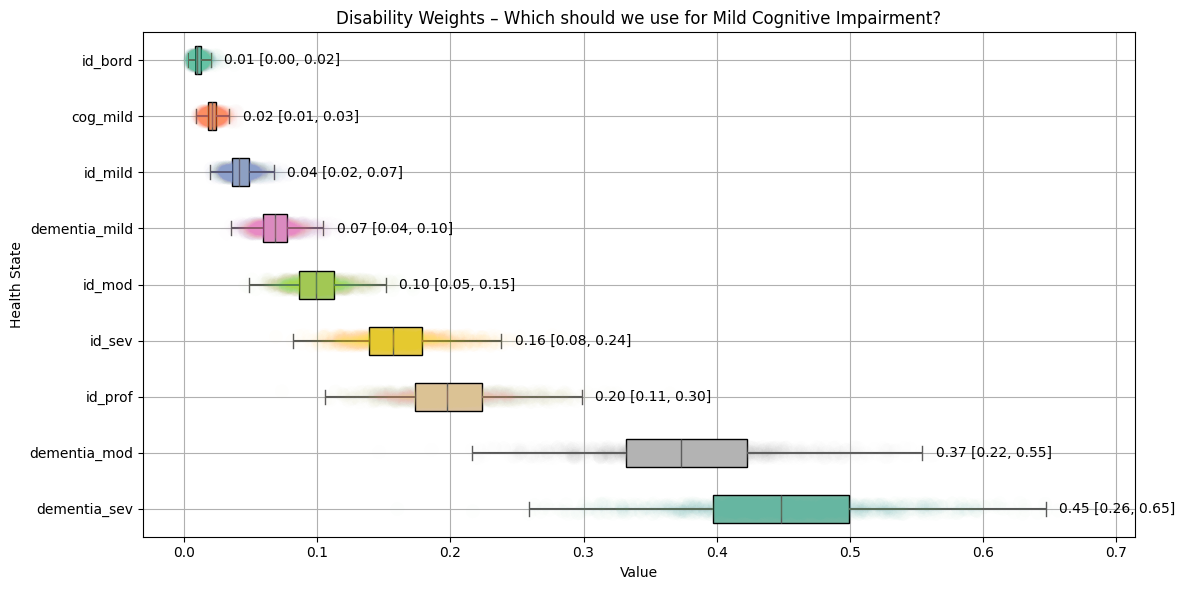

In [108]:
plot_draw_distributions(
    all_data,
    title='Disability Weights – Which should we use for Mild Cognitive Impairment?',
    semilogy=False,
    horizontal=True,
    dot_fraction=1,
    dot_size=10,
    alpha=0.01,
    jitter=0.1
)